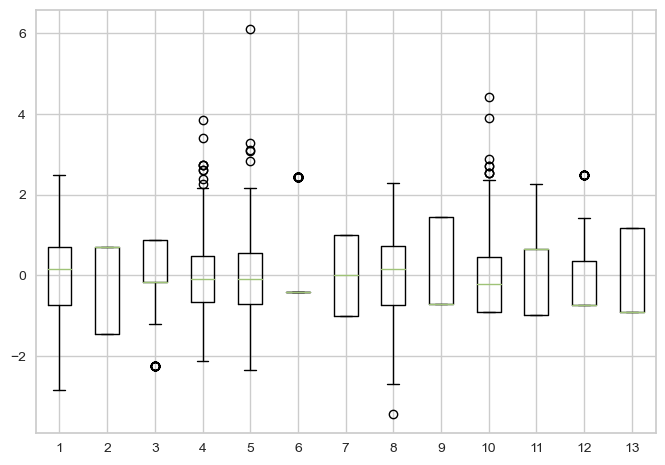

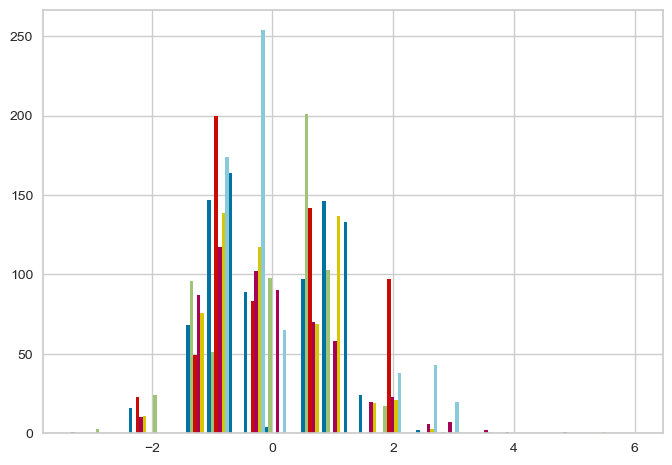

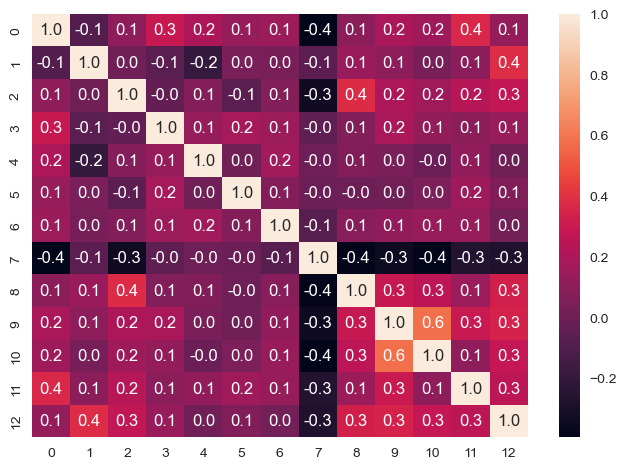

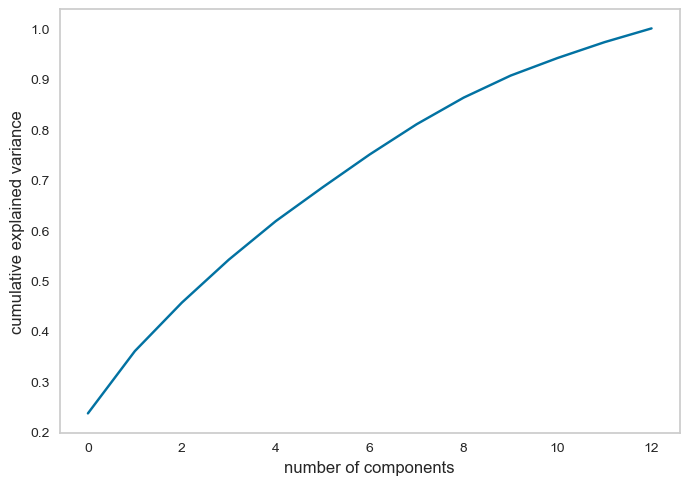

Eigenvalues :  [3.09076392 1.61085694 1.25271584 1.11083842 0.35543623 0.40964027
 0.45476341 0.56982305 0.99631063 0.68723643 0.78191079 0.87658287
 0.84704013]
Eigenvectors :  [[ 0.28586758  0.41866153 -0.01261961  0.12419567  0.03123119 -0.60490431
  -0.01953097 -0.12518455  0.33301471 -0.25119348  0.32869113 -0.13706318
   0.20894989]
 [ 0.11680189 -0.431579    0.48369265  0.2554797   0.15025525 -0.02300399
  -0.53895838  0.01019962 -0.22056993 -0.24877202  0.13528374 -0.12415037
   0.20719272]
 [ 0.28621211 -0.15253955 -0.40887336  0.32658925  0.06591852 -0.12953711
  -0.34113269 -0.4428583  -0.03559127  0.44845459 -0.03321693  0.10476835
  -0.2699967 ]
 [ 0.16784082  0.39151404  0.31463151 -0.18685395  0.11444853  0.26132766
  -0.17185439  0.03297055 -0.08463981  0.36336173  0.432931    0.4907731
   0.07172239]
 [ 0.08350419  0.42820138 -0.2600399   0.19084194  0.02741043  0.14275303
  -0.18867857 -0.04219898 -0.40076951 -0.4200732  -0.41035697  0.29293212
   0.23630352]
 [ 0.076

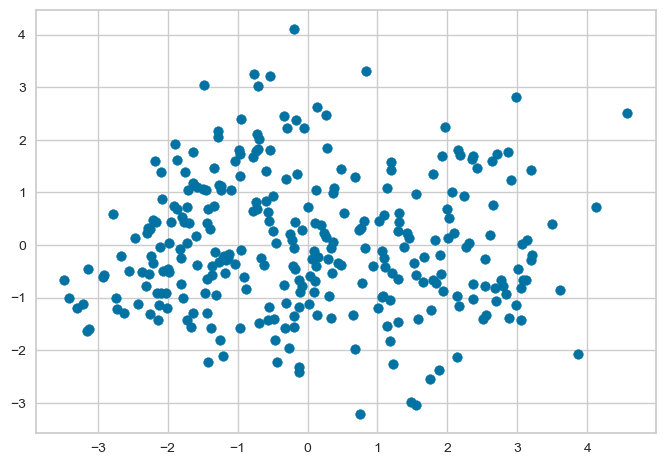

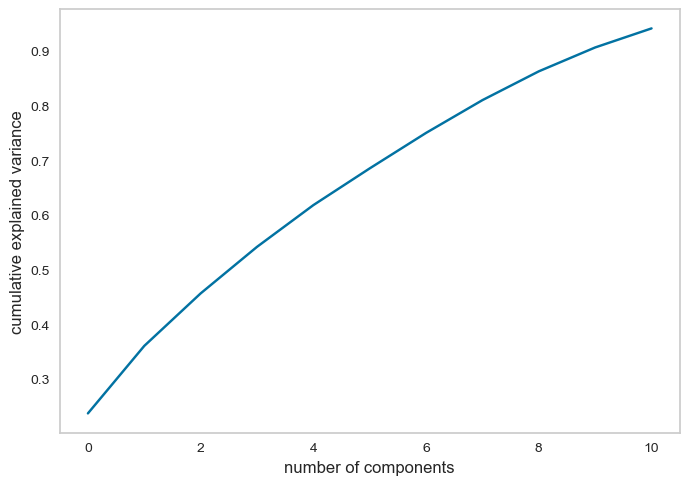

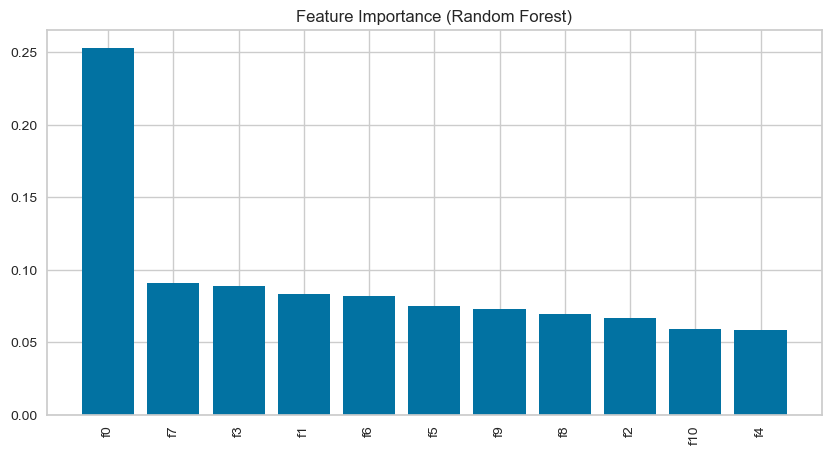

Selected Features :  [ True False False False False False  True False False False False]


In [1]:
from importlib import import_module

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.cluster import KElbowVisualizer, kelbow_visualizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from importlib import import_module
import importnb

with importnb.Notebook():
        # Import the notebook as a module
        dataPreprocessing = import_module("01_data_preprocessing")
        pcaAnalysis = import_module("02_pca_analysis")
        featureSelection = import_module("03_feature_selection")

C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak o

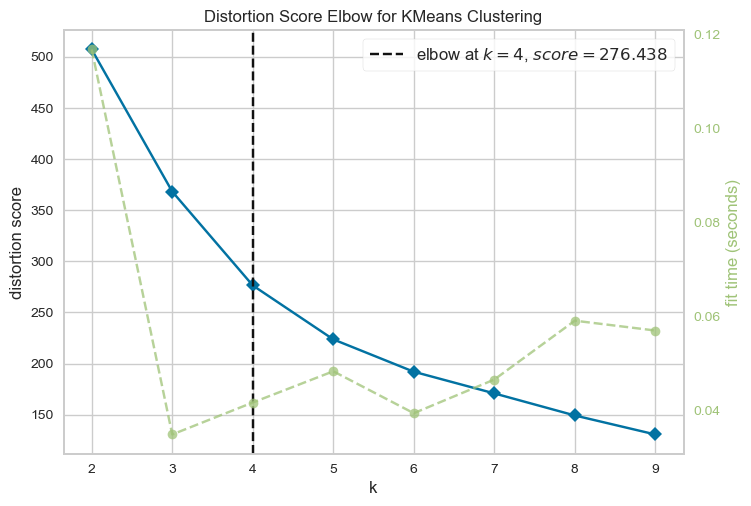

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2]:
finalDataset = pcaAnalysis.X_reduced[: , featureSelection.rfe.get_support()]

X, X_test, y,  y_test = train_test_split(finalDataset , dataPreprocessing.label ,train_size= 0.8, random_state=42)

model = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(model, k=(2,10)) # k range
visualizer.fit(finalDataset)
visualizer.show()

C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


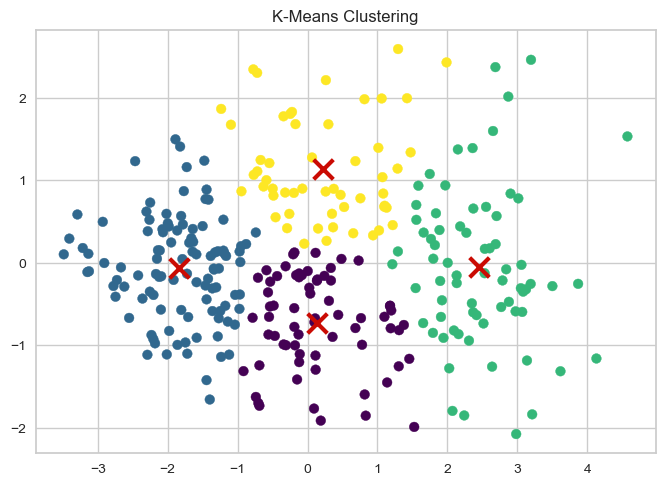

In [3]:
km_model = KMeans(n_clusters=4)
km_model.fit(finalDataset)

plt.scatter(finalDataset[:,0], finalDataset[:,1], c= km_model.labels_, cmap="viridis")
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], marker="x", s=200,linewidths=3, color = "r")
plt.title("K-Means Clustering")
plt.show()

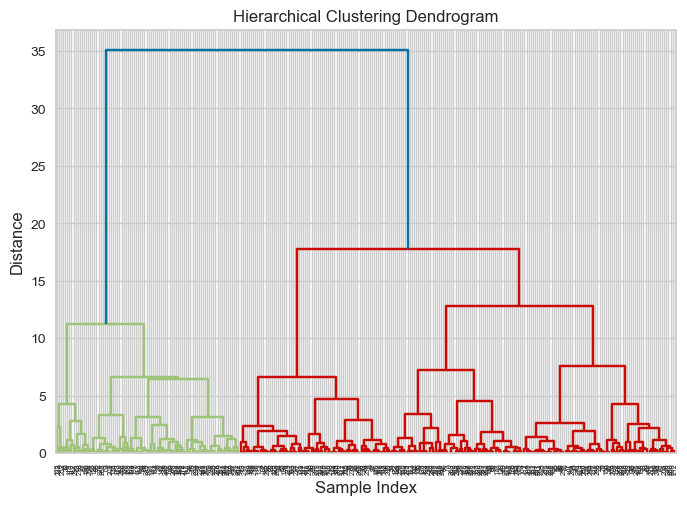

In [4]:
linked = linkage(finalDataset,"ward")
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()